## Zahtevi domaćeg zadatka

1. Učitati i spojiti podatke
    1. Učitati podatke o transakcijama računa (folder `data` fajl `trans.csv`).
    2. Učitati podatke o korisnicima i povezati sa transakcijama (folder `data` fajl `client_accounts.csv`).
    3. Izračunati broj različitih računa koje korisnik poseduje.
    4. Napraviti pivot tabelu sume iznosa po tipu transakcije za svakog klijenta.
    5. Napraviti pivot tabelu sume iznosa po operaciji za svakog klijenta.
    6. Popuniti nedostajuće podatke.
    7. Rezultate iz C, D i E spojiti u jedan skup podataka nad kojim će se raditi klasterovanje od koraka 3.
2. RFM task
    1. Koristiti podatke o transakcijama računa (folder `data` fajl `trans.csv`) i povezati skup podataka sa podacima o korisnicima.
    2. Podeliti klijente (kolonu `client_id`) u 5 grupa i koristeći rfm_group_mapping funkciju (predavanja Segmentacija korisnika).
    3. Recency da se računa kao broj dana od 10.05.2019. godine.
    4. Frequency kao broj transakcija.
    5. Monetary kao prosečna vrednost transakcije.
    6. Prikazati prosečne vrednosti RFM kategorija po svakog grupi.
3. Normalizovati podatke na dva načina po izboru (npr. MaxMin, StandardScaler ili Normalizer). Za svaki od setova normalizovanih podataka uraditi sledeće:
    1. Identifikovati ekstremne vrednosti, karakterisati ih (zašto su ekstremne) i izbaciti iz skupa.
    2. Optimizovati K-means model po broju klastera koristeći SSE i Silhouette (dva optimizovana modela treba dobiti za svaku normalizaciju - ukupno četiri).
    3. Prikazati centroide na osnovu linijskog grafa, 
    4. Opisati svaki klaster u nekoliko rečenica (zapisati u Notebook-u).
    5. Odgovoriti na pitanje koji klaster model je prema vašem mišljenju bolji (optimizovan na osnovu na siluet indeksa ili SSE) i zašto.
4. Kreirati hijerarhijski model klasterovanja.
    1. Prikazati denrogram.
    2. Odrediti granicu preseka na osnovu dendrograma i kreirati klastere (opisati klastere u Notebook-u i opisati zašto ste izabrali baš taj broj klastera).

### Prvi zadatak

import pandas as pd
import numpy as np

In [1]:
import pandas as pd
import numpy as np
df_trans = pd.read_csv('data/trans.csv', low_memory = False)
df_trans.head(5)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,2017-09-10 03:24:33,INCOME,DEPOSIT,700.0,700.0,NaN,NaN,NaN
1,171812,576,2017-09-14 03:24:33,INCOME,DEPOSIT,900.0,900.0,NaN,NaN,NaN
2,207264,704,2017-09-21 03:24:33,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,2017-09-06 03:24:33,INCOME,DEPOSIT,600.0,600.0,NaN,NaN,NaN
4,579373,1972,2017-09-19 03:41:13,INCOME,DEPOSIT,400.0,400.0,NaN,NaN,NaN


In [2]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  object 
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


In [3]:
df_accounts = pd.read_csv('data/client_accounts.csv')
df_accounts.head(5)

,account_id,client_id
0,1,1
1,2,2
2,3,2
3,4,3
4,5,3


In [4]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   account_id  5369 non-null   int64
 1   client_id   5369 non-null   int64
dtypes: int64(2)
memory usage: 84.0 KB


In [5]:
df_spojeni = pd.merge(df_accounts,df_trans, on = 'account_id', how = 'left')
df_spojeni

,account_id,client_id,trans_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1.0,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN
1,1,1,5.0,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,NaN,AB,41403269.0
2,1,1,199.0,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,NaN,NaN,NaN
3,1,1,3530438.0,2018-05-14 09:21:13,INCOME,NaN,19.2,17298.2,UROK,NaN,NaN
4,1,1,6.0,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,NaN,AB,41403269.0
...,...,...,...,...,...,...,...,...,...,...,...
878817,13955,11349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878818,13956,11349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878819,13968,11359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878820,13971,11362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
broj_racuna_po_korisniku = df_spojeni.groupby('client_id')['account_id'].nunique()
broj_racuna_po_korisniku

client_id
1        1
2        2
3        2
4        1
5        1
        ..
11333    1
11349    2
11359    1
11362    1
11382    1
Name: account_id, Length: 4500, dtype: int64

In [7]:
grupisanje = df_spojeni.groupby(['client_id','type'])['amount'].sum().reset_index()
pivot_tabela_1 = pd.pivot_table(grupisanje, values='amount', index='client_id', columns='type', aggfunc='sum', fill_value=0)
pivot_tabela_1


type,CHOICE,EXPENDITURE,INCOME
client_id,,,
1,0,180854.0,194320.5
2,217442,1458946.6,1770112.5
3,0,228021.8,289831.0
4,0,299949.6,347617.5
5,0,561772.0,630267.9
...,...,...,...
9031,209315,313253.0,521032.7
9156,13379,499493.3,532555.5
9199,0,241264.4,318617.2


In [8]:
grupisanje_2 = df_spojeni.groupby(['client_id','operation'])['amount'].sum().reset_index()
pivot_tabela_2 = pd.pivot_table(grupisanje_2, values = 'amount', index = 'client_id' , columns = 'operation' , aggfunc='sum', fill_value=0)
pivot_tabela_2

operation,ACCOUNT TRANSFER,CARD,CHOICE,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,
1,98080.0,0,82774.0,25700.0,165555
2,618247.8,0,1058140.8,219389.0,1537936
3,136164.0,0,91857.8,1400.0,284125
4,185838.0,0,114111.6,900.0,340119
5,97600.0,5900,458272.0,623775.0,0
...,...,...,...,...,...
9031,0.0,0,522568.0,516723.0,0
9156,347096.9,0,165775.4,52300.0,476935
9199,38133.0,0,203131.4,315374.0,0


In [9]:
spajanje_prvo = pd.merge(broj_racuna_po_korisniku, pivot_tabela_1, on = 'client_id', how = 'left')
df = pd.merge(spajanje_prvo, pivot_tabela_2, on = 'client_id', how = 'left')
df

,account_id,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,1,0.0,180854.0,194320.5,98080.0,0.0,82774.0,25700.0,165555.0
2,2,217442.0,1458946.6,1770112.5,618247.8,0.0,1058140.8,219389.0,1537936.0
3,2,0.0,228021.8,289831.0,136164.0,0.0,91857.8,1400.0,284125.0
4,1,0.0,299949.6,347617.5,185838.0,0.0,114111.6,900.0,340119.0
5,1,0.0,561772.0,630267.9,97600.0,5900.0,458272.0,623775.0,0.0
...,...,...,...,...,...,...,...,...,...
11333,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11349,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11359,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.fillna(0)
df

,account_id,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,1,0.0,180854.0,194320.5,98080.0,0.0,82774.0,25700.0,165555.0
2,2,217442.0,1458946.6,1770112.5,618247.8,0.0,1058140.8,219389.0,1537936.0
3,2,0.0,228021.8,289831.0,136164.0,0.0,91857.8,1400.0,284125.0
4,1,0.0,299949.6,347617.5,185838.0,0.0,114111.6,900.0,340119.0
5,1,0.0,561772.0,630267.9,97600.0,5900.0,458272.0,623775.0,0.0
...,...,...,...,...,...,...,...,...,...
11333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11349,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11359,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Drugi zadatak

In [11]:
df_trans_rfm = pd.read_csv('data/trans.csv', low_memory = False)
df_accounts_rfm = pd.read_csv('data/client_accounts.csv')
df_spojeni_rfm = pd.merge(df_accounts_rfm,df_trans_rfm, on = 'account_id', how = 'left')
df_spojeni_rfm

,account_id,client_id,trans_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1.0,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN
1,1,1,5.0,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,NaN,AB,41403269.0
2,1,1,199.0,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,NaN,NaN,NaN
3,1,1,3530438.0,2018-05-14 09:21:13,INCOME,NaN,19.2,17298.2,UROK,NaN,NaN
4,1,1,6.0,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,NaN,AB,41403269.0
...,...,...,...,...,...,...,...,...,...,...,...
878817,13955,11349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878818,13956,11349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878819,13968,11359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878820,13971,11362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_spojeni_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878822 entries, 0 to 878821
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   account_id  878822 non-null  int64  
 1   client_id   878822 non-null  int64  
 2   trans_id    877282 non-null  float64
 3   date        877282 non-null  object 
 4   type        877282 non-null  object 
 5   operation   727053 non-null  object 
 6   amount      877282 non-null  float64
 7   balance     877282 non-null  float64
 8   k_symbol    481651 non-null  object 
 9   bank        232847 non-null  object 
 10  account     246221 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 73.8+ MB


In [13]:
from datetime import datetime, timedelta
df_spojeni_rfm['date'] = pd.to_datetime(df_spojeni_rfm['date'])
referentni_dan = pd.to_datetime('2019-05-10')

df_klijenti = df_spojeni_rfm.groupby('client_id').agg({'date': 'max', 'amount': ['mean', 'count'] })
df_klijenti

date       amount      
                          max         mean count
client_id                                       
1         2019-05-08 13:57:53  1569.767782   239
2         2019-05-09 16:44:33  5792.438824   595
3         2019-05-08 14:37:53  1917.973333   270
4         2019-05-06 15:37:53  2632.386585   246
5         2019-05-05 14:14:33  9169.537692   130
...                       ...          ...   ...
11333                     NaT          NaN     0
11349                     NaT          NaN     0
11359                     NaT          NaN     0
11362                     NaT          NaN     0
11382                     NaT          NaN     0

[4500 rows x 3 columns]

In [14]:
df_klijenti.columns

MultiIndex([(  'date',   'max'),
            ('amount',  'mean'),
            ('amount', 'count')],
           )

In [15]:
df_klijenti.columns = ['-'.join(x) for x in df_klijenti.columns]

In [16]:
df_klijenti

,date-max,amount-mean,amount-count
client_id,,,
1,2019-05-08 13:57:53,1569.767782,239
2,2019-05-09 16:44:33,5792.438824,595
3,2019-05-08 14:37:53,1917.973333,270
4,2019-05-06 15:37:53,2632.386585,246
5,2019-05-05 14:14:33,9169.537692,130
...,...,...,...
11333,NaT,NaN,0
11349,NaT,NaN,0
11359,NaT,NaN,0


In [17]:

df_klijenti['amount-mean'] = df_klijenti['amount-mean'].fillna(0)
df_klijenti

,date-max,amount-mean,amount-count
client_id,,,
1,2019-05-08 13:57:53,1569.767782,239
2,2019-05-09 16:44:33,5792.438824,595
3,2019-05-08 14:37:53,1917.973333,270
4,2019-05-06 15:37:53,2632.386585,246
5,2019-05-05 14:14:33,9169.537692,130
...,...,...,...
11333,NaT,0.000000,0
11349,NaT,0.000000,0
11359,NaT,0.000000,0


In [18]:
df_klijenti.isnull().sum()

date-max        1261
amount-mean        0
amount-count       0
dtype: int64

In [19]:
df_klijenti['diff-date'] = df_klijenti['date-max'].apply(lambda x: (referentni_dan - x).seconds/60)
df_klijenti

,date-max,amount-mean,amount-count,diff-date
client_id,,,,
1,2019-05-08 13:57:53,1569.767782,239,602.116667
2,2019-05-09 16:44:33,5792.438824,595,435.450000
3,2019-05-08 14:37:53,1917.973333,270,562.116667
4,2019-05-06 15:37:53,2632.386585,246,502.116667
5,2019-05-05 14:14:33,9169.537692,130,585.450000
...,...,...,...,...
11333,NaT,0.000000,0,NaN
11349,NaT,0.000000,0,NaN
11359,NaT,0.000000,0,NaN


In [20]:
df_klijenti['diff-date'] = 1/df_klijenti['diff-date']
df_klijenti

,date-max,amount-mean,amount-count,diff-date
client_id,,,,
1,2019-05-08 13:57:53,1569.767782,239,0.001661
2,2019-05-09 16:44:33,5792.438824,595,0.002296
3,2019-05-08 14:37:53,1917.973333,270,0.001779
4,2019-05-06 15:37:53,2632.386585,246,0.001992
5,2019-05-05 14:14:33,9169.537692,130,0.001708
...,...,...,...,...
11333,NaT,0.000000,0,NaN
11349,NaT,0.000000,0,NaN
11359,NaT,0.000000,0,NaN


In [21]:
df_klijenti['diff-date'] = df_klijenti['diff-date'].fillna(0)
df_klijenti

,date-max,amount-mean,amount-count,diff-date
client_id,,,,
1,2019-05-08 13:57:53,1569.767782,239,0.001661
2,2019-05-09 16:44:33,5792.438824,595,0.002296
3,2019-05-08 14:37:53,1917.973333,270,0.001779
4,2019-05-06 15:37:53,2632.386585,246,0.001992
5,2019-05-05 14:14:33,9169.537692,130,0.001708
...,...,...,...,...
11333,NaT,0.000000,0,0.000000
11349,NaT,0.000000,0,0.000000
11359,NaT,0.000000,0,0.000000


In [22]:
df_klijenti['Recency'] = pd.qcut(df_klijenti['diff-date'],q = 6, labels = False, duplicates='drop') + 1
df_klijenti

,date-max,amount-mean,amount-count,diff-date,Recency
client_id,,,,,
1,2019-05-08 13:57:53,1569.767782,239,0.001661,2
2,2019-05-09 16:44:33,5792.438824,595,0.002296,4
3,2019-05-08 14:37:53,1917.973333,270,0.001779,3
4,2019-05-06 15:37:53,2632.386585,246,0.001992,3
5,2019-05-05 14:14:33,9169.537692,130,0.001708,3
...,...,...,...,...,...
11333,NaT,0.000000,0,0.000000,1
11349,NaT,0.000000,0,0.000000,1
11359,NaT,0.000000,0,0.000000,1


In [23]:
df_klijenti['Frequency'] = pd.qcut(df_klijenti['amount-count'], q=6, labels=False, duplicates='drop') + 1
df_klijenti['Monetary'] = pd.qcut(df_klijenti['amount-mean'], q=6, labels=False, duplicates='drop') + 1
df_klijenti

,date-max,amount-mean,amount-count,diff-date,Recency,Frequency,Monetary
client_id,,,,,,,
1,2019-05-08 13:57:53,1569.767782,239,0.001661,2,3,2
2,2019-05-09 16:44:33,5792.438824,595,0.002296,4,5,4
3,2019-05-08 14:37:53,1917.973333,270,0.001779,3,4,2
4,2019-05-06 15:37:53,2632.386585,246,0.001992,3,3,3
5,2019-05-05 14:14:33,9169.537692,130,0.001708,3,2,5
...,...,...,...,...,...,...,...
11333,NaT,0.000000,0,0.000000,1,1,1
11349,NaT,0.000000,0,0.000000,1,1,1
11359,NaT,0.000000,0,0.000000,1,1,1


In [24]:
df_klijenti

,date-max,amount-mean,amount-count,diff-date,Recency,Frequency,Monetary
client_id,,,,,,,
1,2019-05-08 13:57:53,1569.767782,239,0.001661,2,3,2
2,2019-05-09 16:44:33,5792.438824,595,0.002296,4,5,4
3,2019-05-08 14:37:53,1917.973333,270,0.001779,3,4,2
4,2019-05-06 15:37:53,2632.386585,246,0.001992,3,3,3
5,2019-05-05 14:14:33,9169.537692,130,0.001708,3,2,5
...,...,...,...,...,...,...,...
11333,NaT,0.000000,0,0.000000,1,1,1
11349,NaT,0.000000,0,0.000000,1,1,1
11359,NaT,0.000000,0,0.000000,1,1,1


In [25]:
df_klijenti['RFM'] = df_klijenti[['Recency', 'Frequency', 'Monetary']].agg('prod',axis = 1)
df_klijenti.head(15)

,date-max,amount-mean,amount-count,diff-date,Recency,Frequency,Monetary,RFM
client_id,,,,,,,,
1,2019-05-08 13:57:53,1569.767782,239,0.001661,2,3,2,12
2,2019-05-09 16:44:33,5792.438824,595,0.002296,4,5,4,80
3,2019-05-08 14:37:53,1917.973333,270,0.001779,3,4,2,24
4,2019-05-06 15:37:53,2632.386585,246,0.001992,3,3,3,27
5,2019-05-05 14:14:33,9169.537692,130,0.001708,3,2,5,30
6,2019-05-06 13:37:53,6743.724803,254,0.001607,2,3,4,24
7,2019-05-08 17:07:53,1929.180332,361,0.002426,4,4,2,32
8,2019-05-07 17:07:53,3797.383626,342,0.002426,4,4,3,48
9,2019-05-06 04:51:13,2044.823585,106,0.000870,1,2,2,4


In [26]:
def rfm_group_mapping(R, F, M):
    if (R == 1) & (F == 1) & (M == 1):
        return 'Neaktivani korisnici'
    elif (R <= 2) & (F <= 2) & (M <= 2):
        return 'Korisnici rizicni da se izgube'
    elif (R <= 2) & (4 <= F <= 5) & (4 <= M <= 5):
        return 'Vredni korisnci'
    elif (4 <= R <= 5) & (4 <= F <= 5) & (4 <= M <= 5):
        return 'Najlojalniji korisnici'
    else:
        return 'Prosecni korsnici'

In [27]:
df_klijenti['RFM Group'] = df_klijenti.apply(lambda x: rfm_group_mapping(x['Recency'], x['Frequency'], x['Monetary']), axis=1)
df_klijenti.head(30)

,date-max,amount-mean,amount-count,diff-date,Recency,Frequency,Monetary,RFM,RFM Group
client_id,,,,,,,,,
1,2019-05-08 13:57:53,1569.767782,239,0.001661,2,3,2,12,Prosecni korsnici
2,2019-05-09 16:44:33,5792.438824,595,0.002296,4,5,4,80,Najlojalniji korisnici
3,2019-05-08 14:37:53,1917.973333,270,0.001779,3,4,2,24,Prosecni korsnici
4,2019-05-06 15:37:53,2632.386585,246,0.001992,3,3,3,27,Prosecni korsnici
5,2019-05-05 14:14:33,9169.537692,130,0.001708,3,2,5,30,Prosecni korsnici
6,2019-05-06 13:37:53,6743.724803,254,0.001607,2,3,4,24,Prosecni korsnici
7,2019-05-08 17:07:53,1929.180332,361,0.002426,4,4,2,32,Prosecni korsnici
8,2019-05-07 17:07:53,3797.383626,342,0.002426,4,4,3,48,Prosecni korsnici
9,2019-05-06 04:51:13,2044.823585,106,0.000870,1,2,2,4,Korisnici rizicni da se izgube


In [28]:
prosecne_vrednosti = df_klijenti.groupby('RFM Group').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM': 'mean'
}).reset_index()

print(prosecne_vrednosti)

                        RFM Group   Recency  Frequency  Monetary        RFM
0  Korisnici rizicni da se izgube  1.727941   1.764706  1.779412   5.426471
1          Najlojalniji korisnici  4.519444   4.563889  4.508333  92.705556
2            Neaktivani korisnici  1.000000   1.000000  1.000000   1.000000
3               Prosecni korsnici  3.312231   3.137163  3.149277  31.404846
4                 Vredni korisnci  1.822222   4.483333  4.505556  36.850000


### Treci zadatak

In [29]:
df

,account_id,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,1,0.0,180854.0,194320.5,98080.0,0.0,82774.0,25700.0,165555.0
2,2,217442.0,1458946.6,1770112.5,618247.8,0.0,1058140.8,219389.0,1537936.0
3,2,0.0,228021.8,289831.0,136164.0,0.0,91857.8,1400.0,284125.0
4,1,0.0,299949.6,347617.5,185838.0,0.0,114111.6,900.0,340119.0
5,1,0.0,561772.0,630267.9,97600.0,5900.0,458272.0,623775.0,0.0
...,...,...,...,...,...,...,...,...,...
11333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11349,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11359,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 1 to 11382
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account_id             4500 non-null   int64  
 1   CHOICE_x               4500 non-null   float64
 2   EXPENDITURE            4500 non-null   float64
 3   INCOME                 4500 non-null   float64
 4   ACCOUNT TRANSFER       4500 non-null   float64
 5   CARD                   4500 non-null   float64
 6   CHOICE_y               4500 non-null   float64
 7   DEPOSIT                4500 non-null   float64
 8   TRANSFER FROM ACCOUNT  4500 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 351.6 KB


In [31]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_norm = scaler.transform(df)
df_norm = pd.DataFrame(df_norm)
df_norm.columns=['Number_of_accounts','CHOICE_x','EXPENDITURE', 'INCOME', 'ACCOUNT TRANSFER', 'CARD', 'CHOICE_y' ,'DEPOSIT', 'TRANSFER FROM ACCOUNT']
df_norm

,Number_of_accounts,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
0,0.0,0.000000,0.036118,0.032826,0.086932,0.000000,0.014929,0.006690,0.043357
1,1.0,0.276449,0.291361,0.299019,0.547975,0.000000,0.190850,0.057108,0.402767
2,1.0,0.000000,0.045537,0.048960,0.120687,0.000000,0.016568,0.000364,0.074409
3,0.0,0.000000,0.059902,0.058722,0.164715,0.000000,0.020582,0.000234,0.089073
4,0.0,0.000000,0.112189,0.106469,0.086506,0.038337,0.082656,0.162371,0.000000
...,...,...,...,...,...,...,...,...,...
4495,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4496,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4497,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4498,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


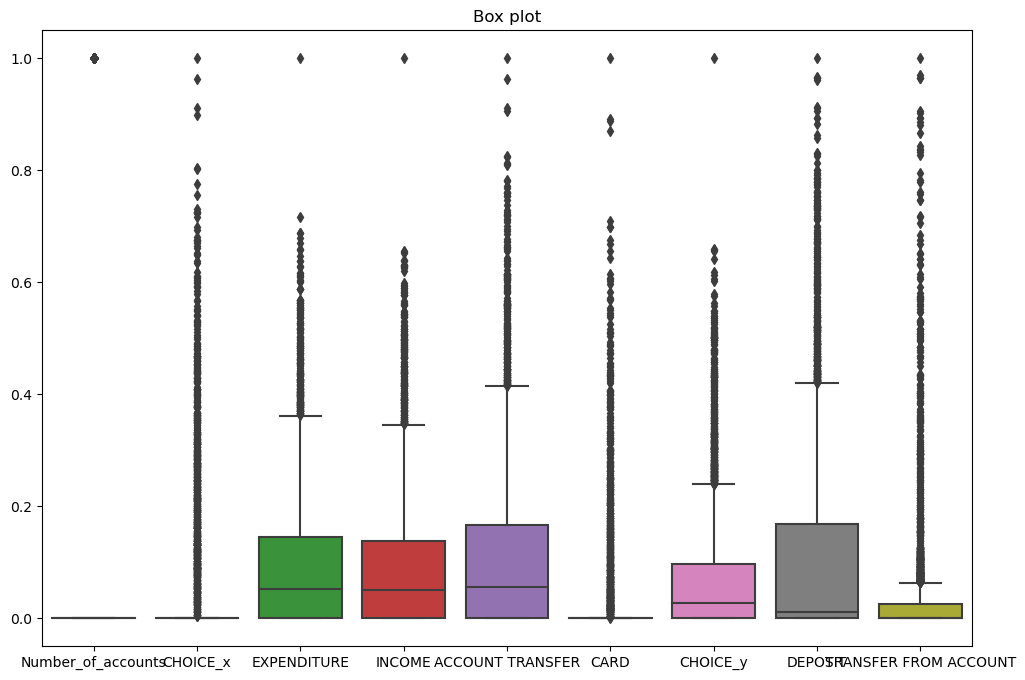

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(data = df_norm)
plt.title("Box plot")
plt.show()

In [33]:
scaler_2 = StandardScaler()
df_norm_2 = scaler_2.fit_transform(df)
df_norm_2 = pd.DataFrame(df_norm_2)
df_norm_2.columns=['Number_of_accounts','CHOICE_x','EXPENDITURE', 'INCOME', 'ACCOUNT TRANSFER', 'CARD', 'CHOICE_y' ,'DEPOSIT', 'TRANSFER FROM ACCOUNT']
df_norm_2


,Number_of_accounts,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
0,-0.489212,-0.347471,-0.503417,-0.519490,-0.152925,-0.278142,-0.538457,-0.622518,0.091647
1,2.044105,2.125107,1.546907,1.706587,3.003518,-0.278142,1.125588,-0.322118,3.631847
2,2.044105,-0.347471,-0.427750,-0.384565,0.078173,-0.278142,-0.522960,-0.660205,0.397511
3,-0.489212,-0.347471,-0.312363,-0.302931,0.379601,-0.278142,-0.484993,-0.660981,0.541953
4,-0.489212,-0.347471,0.107654,0.096361,-0.155838,0.183625,0.102169,0.305059,-0.335419
...,...,...,...,...,...,...,...,...,...
4495,-0.489212,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419
4496,2.044105,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419
4497,-0.489212,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419
4498,-0.489212,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419


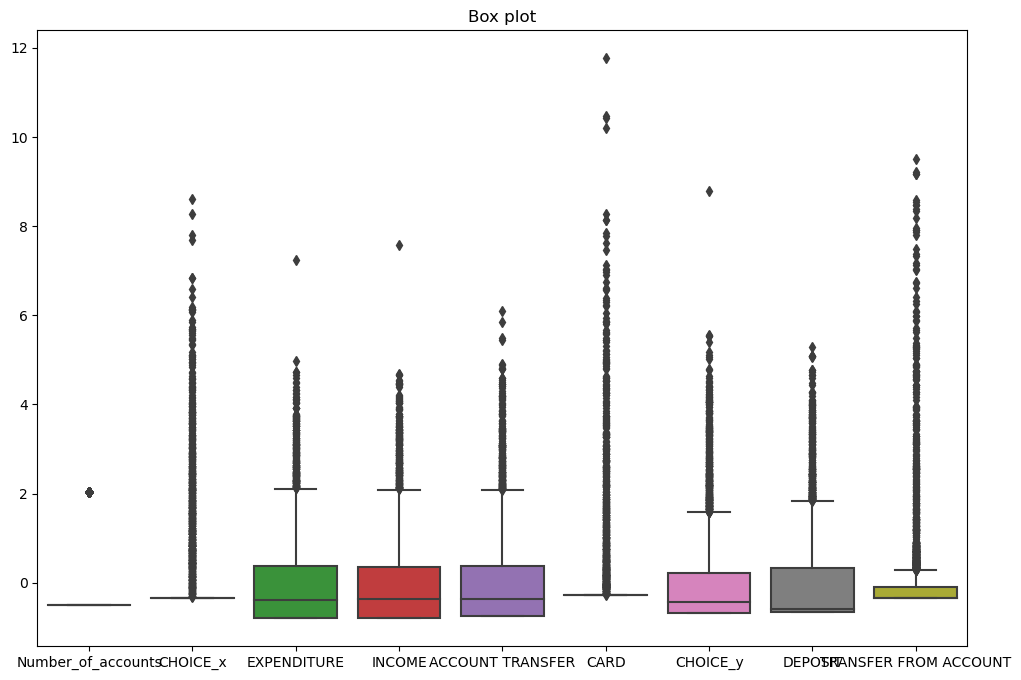

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df_norm_2)
plt.title("Box plot")
plt.show()

In [35]:
import numpy as np

def remove_outlier_clients(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    outliers_count = (z_scores > threshold).sum(axis=1)
    df_cleaned = df[outliers_count < threshold]
    return df_cleaned

columns_to_check = ['EXPENDITURE', 'INCOME', 'ACCOUNT TRANSFER','CHOICE_y' ,'DEPOSIT', 'TRANSFER FROM ACCOUNT']

df_cleaned_1 = remove_outlier_clients(df_norm, columns_to_check, threshold=3)
df_cleaned_1

,Number_of_accounts,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
0,0.0,0.000000,0.036118,0.032826,0.086932,0.000000,0.014929,0.006690,0.043357
1,1.0,0.276449,0.291361,0.299019,0.547975,0.000000,0.190850,0.057108,0.402767
2,1.0,0.000000,0.045537,0.048960,0.120687,0.000000,0.016568,0.000364,0.074409
3,0.0,0.000000,0.059902,0.058722,0.164715,0.000000,0.020582,0.000234,0.089073
4,0.0,0.000000,0.112189,0.106469,0.086506,0.038337,0.082656,0.162371,0.000000
...,...,...,...,...,...,...,...,...,...
4495,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4496,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4497,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4498,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
def remove_outlier_clients(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    outliers_count = (z_scores > threshold).sum(axis=1)
    df_cleaned = df[outliers_count < threshold]
    return df_cleaned

columns_to_check = ['EXPENDITURE', 'INCOME', 'ACCOUNT TRANSFER','CHOICE_y' ,'DEPOSIT', 'TRANSFER FROM ACCOUNT']

df_cleaned_2 = remove_outlier_clients(df_norm_2, columns_to_check, threshold=3)
df_cleaned_2

,Number_of_accounts,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
0,-0.489212,-0.347471,-0.503417,-0.519490,-0.152925,-0.278142,-0.538457,-0.622518,0.091647
1,2.044105,2.125107,1.546907,1.706587,3.003518,-0.278142,1.125588,-0.322118,3.631847
2,2.044105,-0.347471,-0.427750,-0.384565,0.078173,-0.278142,-0.522960,-0.660205,0.397511
3,-0.489212,-0.347471,-0.312363,-0.302931,0.379601,-0.278142,-0.484993,-0.660981,0.541953
4,-0.489212,-0.347471,0.107654,0.096361,-0.155838,0.183625,0.102169,0.305059,-0.335419
...,...,...,...,...,...,...,...,...,...
4495,-0.489212,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419
4496,2.044105,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419
4497,-0.489212,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419
4498,-0.489212,-0.347471,-0.793544,-0.794001,-0.748087,-0.278142,-0.679676,-0.662377,-0.335419


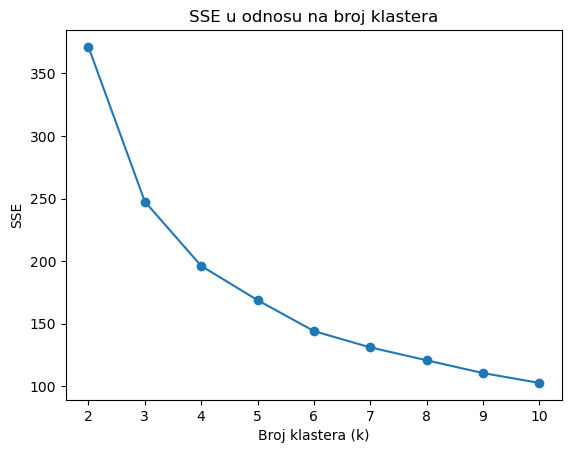

In [37]:
from sklearn.cluster import KMeans

sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned_1)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Broj klastera (k)')
plt.ylabel('SSE')
plt.title('SSE u odnosu na broj klastera')
plt.show()

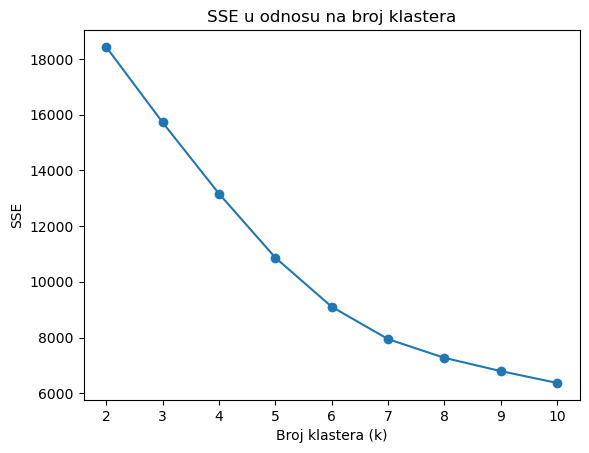

In [38]:
sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned_2)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Broj klastera (k)')
plt.ylabel('SSE')
plt.title('SSE u odnosu na broj klastera')
plt.show()

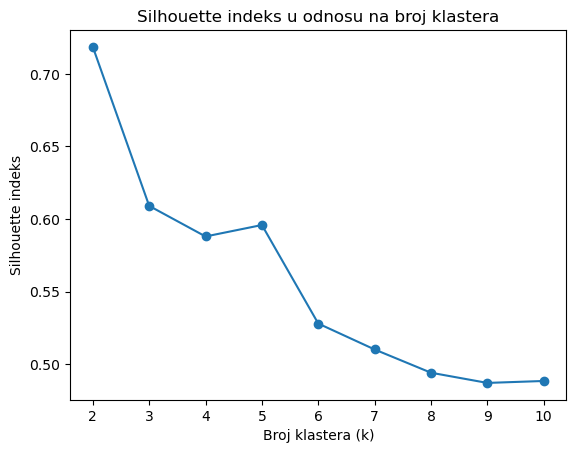

In [39]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(df_cleaned_1)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_cleaned_1, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Broj klastera (k)')
plt.ylabel('Silhouette indeks')
plt.title('Silhouette indeks u odnosu na broj klastera')
plt.show()

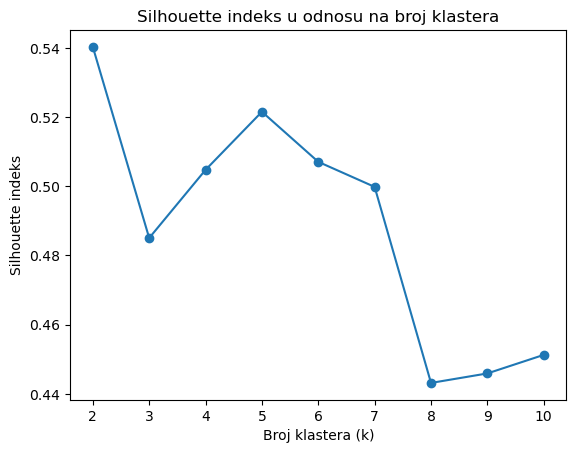

In [40]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(df_cleaned_2)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_cleaned_2, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Broj klastera (k)')
plt.ylabel('Silhouette indeks')
plt.title('Silhouette indeks u odnosu na broj klastera')
plt.show()

In [41]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters= 2,max_iter = 100, n_init = 10)
kmeans_model_1 = kmeans_1.fit(df_cleaned_1)
centroidi_1 = kmeans_model_1.cluster_centers_
print(centroidi_1)

[[-1.99840144e-15  2.66183252e-02  7.47585015e-02  7.17621801e-02
   8.78992666e-02  1.87100066e-02  5.28877179e-02  8.41823077e-02
   2.55362101e-02]
 [ 1.00000000e+00  4.52542527e-02  1.48643709e-01  1.42254956e-01
   1.72565498e-01  3.20957246e-02  1.04659989e-01  1.75137634e-01
   4.22703179e-02]]


In [42]:
kmeans_2 = KMeans(n_clusters= 2,max_iter = 100, n_init = 10)
kmeans_model_2 = kmeans_2.fit(df_cleaned_2)
centroidi_2 = kmeans_model_2.cluster_centers_
print(centroidi_2)

[[-0.17960912 -0.30969697 -0.48206717 -0.4806547  -0.3498328  -0.19875708
  -0.45645409 -0.43017173 -0.15653591]
 [ 0.49324489  0.67296316  1.21315378  1.20177534  0.97086527  0.5486199
   1.1062349   1.14087173  0.2818411 ]]


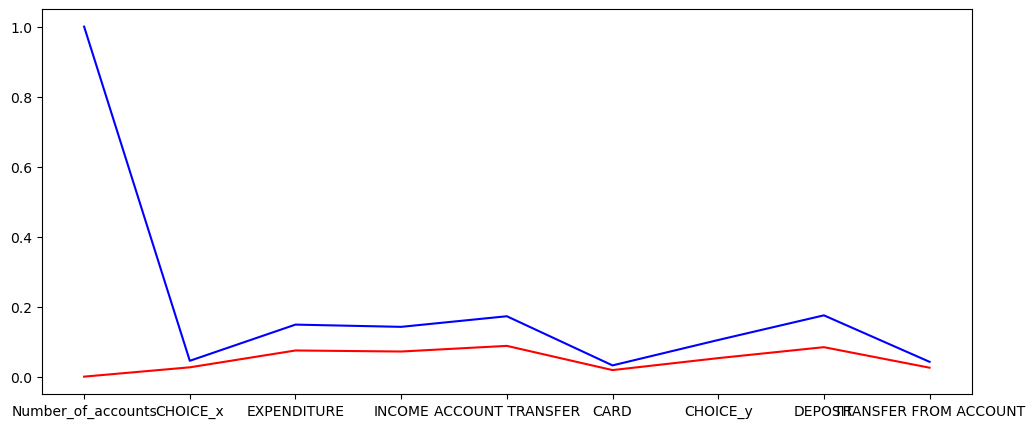

In [43]:
plt.close()
plt.rcParams['figure.figsize']=[12,5]
plt.plot(centroidi_1[0,:], c = 'r')
plt.plot(centroidi_1[1,:], c = 'b')
att_names = list(df_cleaned_1) 
plt.xticks(list(range(9)), att_names)
plt.show()

## Klaster 1: Korisnici sa uglavnom jednim racunom koji su neaktivni ili imaju male transakcije

## Klaster 2: Korisnici sa uglavnom dva racuna koji imaju vece transakcije

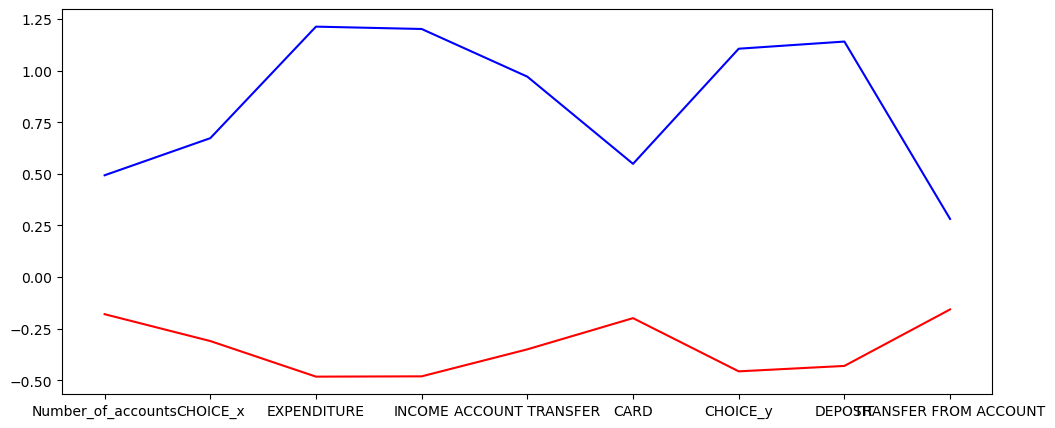

In [44]:
plt.close()
plt.rcParams['figure.figsize']=[12,5]
plt.plot(centroidi_2[0,:], c = 'r')
plt.plot(centroidi_2[1,:], c = 'b')
att_names = list(df_cleaned_2)
plt.xticks(list(range(9)), att_names)
plt.show()

## Klaster 1: Korisnici sa uglavnom jednim racunom koji su neaktivni ili imaju male transakcije

## Klaster 2: Korisnici sa uglavnom dva racuna koji imaju vece transakcije

C:\Users\PC\AppData\Local\Temp\ipykernel_6240\3699197704.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2['Cluster'] = clusters_predict


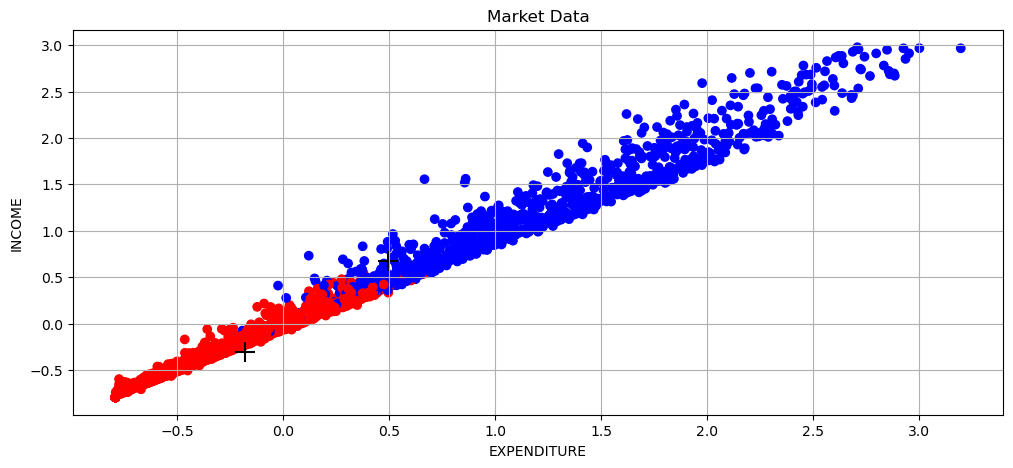

In [45]:
def draw_clusters(df, x, y, cluster_color, cluster_label, centers):
    plt.close()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Market Data')
    plt.scatter(df[x], df[y], c = cluster_color, label = df[cluster_label])
    plt.scatter(centers[:,0], centers[:,1], marker='+', s = 200, c = 'black')
    plt.grid()
    plt.show()
    
kmeans_model_1 = kmeans_1.fit(df_cleaned_2)
clusters_predict = kmeans_model_1.predict(df_cleaned_2)
df_cleaned_2['Cluster'] = clusters_predict
cluster_color_map = {0:'r', 1:'b'}
cluster_predict_color = [cluster_color_map[i] for i in df_cleaned_2.Cluster]
draw_clusters(df_cleaned_2, 'EXPENDITURE', 'INCOME', cluster_predict_color, 'Cluster', centroidi_2 )

### Cetvrti zadatak

In [46]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [47]:
Z = linkage(df_cleaned_1, 'ward')

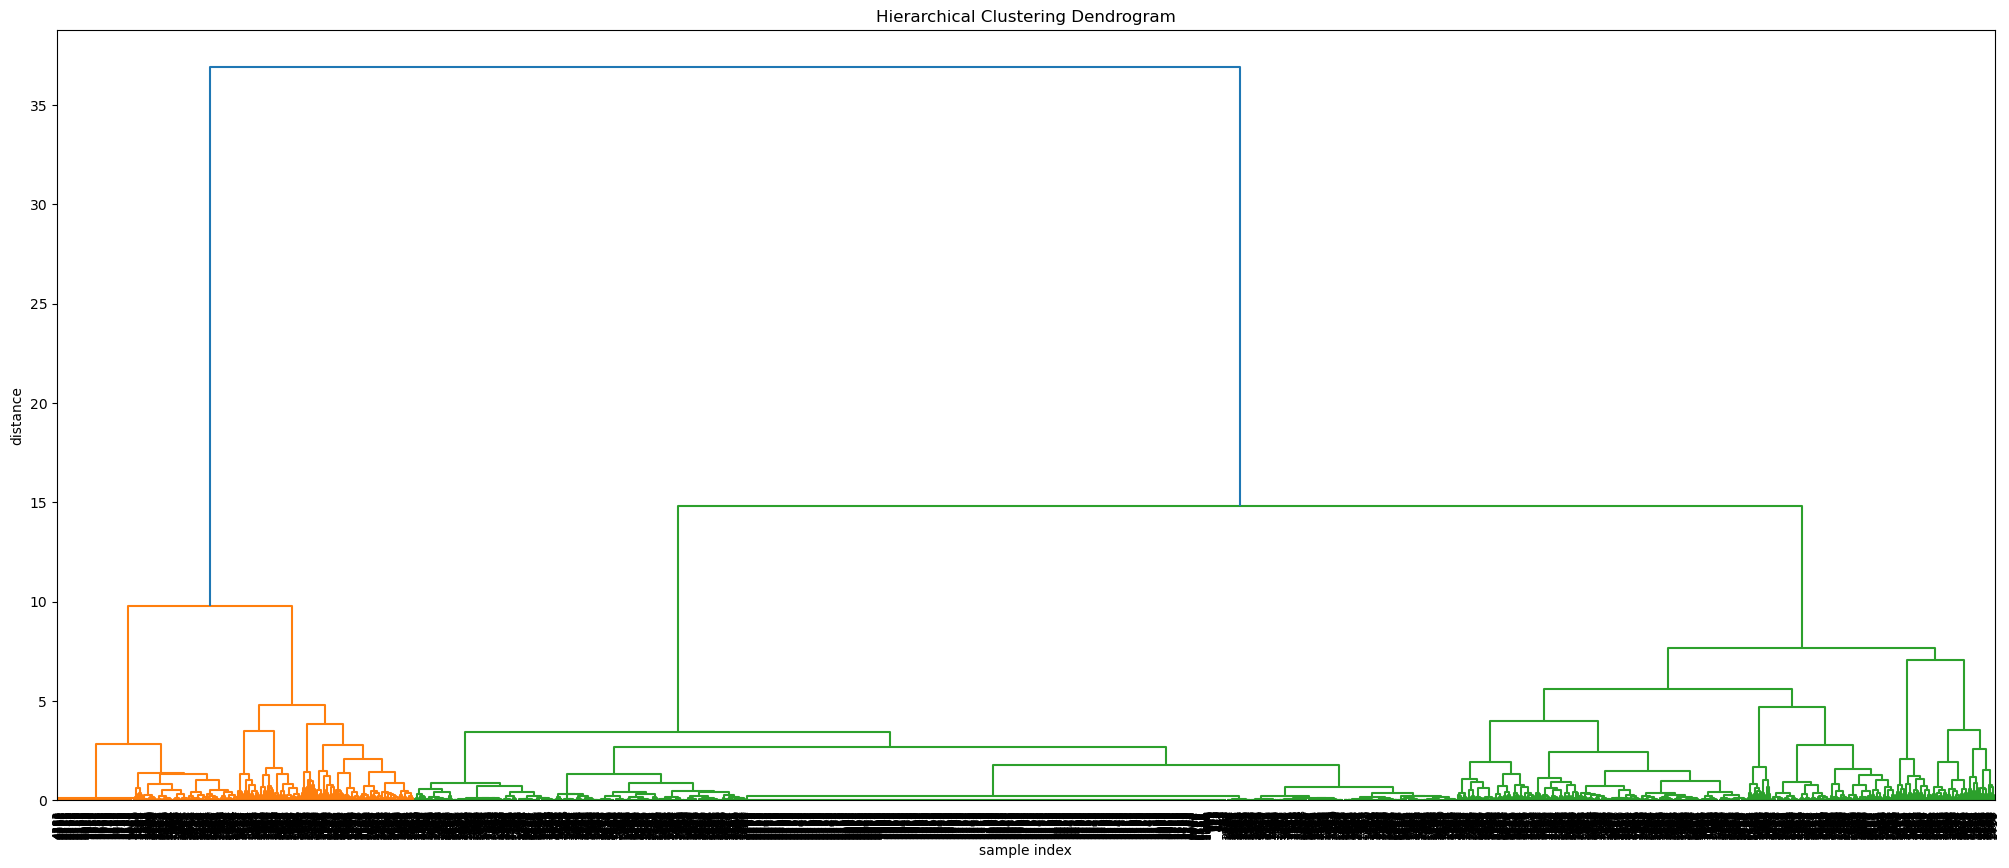

In [48]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., 
    leaf_font_size=8.,
)
plt.show()

In [49]:
from scipy.cluster.hierarchy import fcluster

cut_height = 9

clusters = fcluster(Z, t=cut_height, criterion='distance')

df_cleaned_1['Cluster'] = clusters

print(df_cleaned_1 .head())

   Number_of_accounts  CHOICE_x  EXPENDITURE    INCOME  ACCOUNT TRANSFER  \
0                 0.0  0.000000     0.036118  0.032826          0.086932   
1                 1.0  0.276449     0.291361  0.299019          0.547975   
2                 1.0  0.000000     0.045537  0.048960          0.120687   
3                 0.0  0.000000     0.059902  0.058722          0.164715   
4                 0.0  0.000000     0.112189  0.106469          0.086506   

       CARD  CHOICE_y   DEPOSIT  TRANSFER FROM ACCOUNT  Cluster  
0  0.000000  0.014929  0.006690               0.043357        3  
1  0.000000  0.190850  0.057108               0.402767        2  
2  0.000000  0.016568  0.000364               0.074409        1  
3  0.000000  0.020582  0.000234               0.089073        3  
4  0.038337  0.082656  0.162371               0.000000        4  


C:\Users\PC\AppData\Local\Temp\ipykernel_6240\929589151.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_1['Cluster'] = clusters


In [50]:
cluster_means = df_cleaned_1.groupby('Cluster').mean()
print(cluster_means)


         Number_of_accounts  CHOICE_x  EXPENDITURE    INCOME  \
Cluster                                                        
1                       1.0  0.006378     0.046282  0.045940   
2                       1.0  0.085100     0.253558  0.240972   
3                       0.0  0.001534     0.021495  0.021241   
4                       0.0  0.075304     0.178140  0.169821   

         ACCOUNT TRANSFER      CARD  CHOICE_y   DEPOSIT  TRANSFER FROM ACCOUNT  
Cluster                                                                         
1                0.073546  0.004077  0.027625  0.035790               0.034251  
2                0.274054  0.060813  0.183616  0.317960               0.050490  
3                0.033831  0.001071  0.012717  0.014389               0.017965  
4                0.192843  0.052947  0.130857  0.219647               0.040232  


## Klaster 1: Ljudi sa uglavnom jednim racunom koji imaju male transakcije ili su naktivni
## Klaster 2: Ljudi sa uglavnom jednim racunom koji imaju vece transakcije
## Klaster 3: Ljudi sa uglavnom dva racuna koji imaju male transakcije ili su naktivni
## Klaster 4: Ljudi sa uglavnom dva racuna koji imaju vece transakcije